# RL, Gymnasium, Q-Learning - Frozen Lake v1

### Hyperparameters:
- (is_slippery=False)
- num_episodes = 15000
- max_steps_per_episode = 100
- learning_rate = 0.1
- discount_rate = 0.9
- exploration_rate = 1
- max_exploration_rate = 1
- min_exploration_rate = 0.01
- exploration_decay_rate = 0.0005

# 1. Setup

In [1]:
# Cell 1: Setup
import gymnasium as gym
import numpy as np
import random
import time
from IPython.display import clear_output

# 2. Environment Setup

> NOTE: Try `is_slippery=True`

Examining the environment with `is_slippery=True`, I see some interesting challenges:

- **Stochastic Transitions:** The slippery ice adds a layer of complexity. Moving in a direction doesn't guarantee staying on course; there's a chance of sliding sideways. This randomness affects state transitions, making them less predictable.

- **Complex Learning:** Because of this slipperiness, our Q-learning algorithm might take longer to converge. The agent not only needs to find the best path to the goal but also learn to adapt to the uncertain movements. It must develop a policy robust enough to handle the variability introduced by the slippery ice.

- **Variance in Rewards:** Expect more variation in rewards during training. With the added uncertainty, the agent will likely experience more falls into holes and lower rewards, especially early on. It's a tougher learning curve, but mastering it means mastering the unpredictability of the environment.

For visualisation purposes, you can change `render_mode='rgb_array'` to `render_mode='human'` and see the environment in action, but this slows down the training process significantly.

In [2]:
# Cell 2: Environment Setup
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))
print("Q-Table Size: ", q_table.shape)

Q-Table Size:  (16, 4)


# 3. Q-Learning Algorithm Implementation

In [3]:
# Cell 3: Q-Learning Algorithm Parameters
num_episodes = 15000 
max_steps_per_episode = 100

learning_rate = 0.1  # Increased because the environment is deterministic
discount_rate = 0.9  # Slightly reduced to focus on immediate rewards

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.0005  # Faster decay to shift to exploitation sooner

In [4]:
# Cell 4: Q-Learning Algorithm Implementation with corrected state handling
rewards_all_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    initial_state = env.reset()
    state = initial_state[0] if isinstance(initial_state, tuple) else initial_state  # state extraction
    terminated = False
    truncated = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()
        
        # Execute the action
        new_state, reward, terminated, truncated, info = env.step(action)
        new_state = new_state[0] if isinstance(new_state, tuple) else new_state  # state extraction

        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        state = new_state  # Update the state
        rewards_current_episode += reward
        
        if terminated or truncated:
            break
        
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(rewards_current_episode)

    if episode % 100 == 0:  # Print status every 100 episodes to track progress
        print(f"Episode {episode}: Reward = {rewards_current_episode}")

print("Training completed.")

Episode 0: Reward = 0.0
Episode 100: Reward = 0.0
Episode 200: Reward = 0.0
Episode 300: Reward = 0.0
Episode 400: Reward = 0.0
Episode 500: Reward = 0.0
Episode 600: Reward = 0.0
Episode 700: Reward = 0.0
Episode 800: Reward = 0.0
Episode 900: Reward = 1.0
Episode 1000: Reward = 1.0
Episode 1100: Reward = 0.0
Episode 1200: Reward = 0.0
Episode 1300: Reward = 0.0
Episode 1400: Reward = 1.0
Episode 1500: Reward = 0.0
Episode 1600: Reward = 1.0
Episode 1700: Reward = 0.0
Episode 1800: Reward = 1.0
Episode 1900: Reward = 1.0
Episode 2000: Reward = 1.0
Episode 2100: Reward = 0.0
Episode 2200: Reward = 0.0
Episode 2300: Reward = 0.0
Episode 2400: Reward = 0.0
Episode 2500: Reward = 0.0
Episode 2600: Reward = 1.0
Episode 2700: Reward = 1.0
Episode 2800: Reward = 0.0
Episode 2900: Reward = 1.0
Episode 3000: Reward = 1.0
Episode 3100: Reward = 1.0
Episode 3200: Reward = 1.0
Episode 3300: Reward = 1.0
Episode 3400: Reward = 1.0
Episode 3500: Reward = 0.0
Episode 3600: Reward = 1.0
Episode 3700:

# 4. Training Output

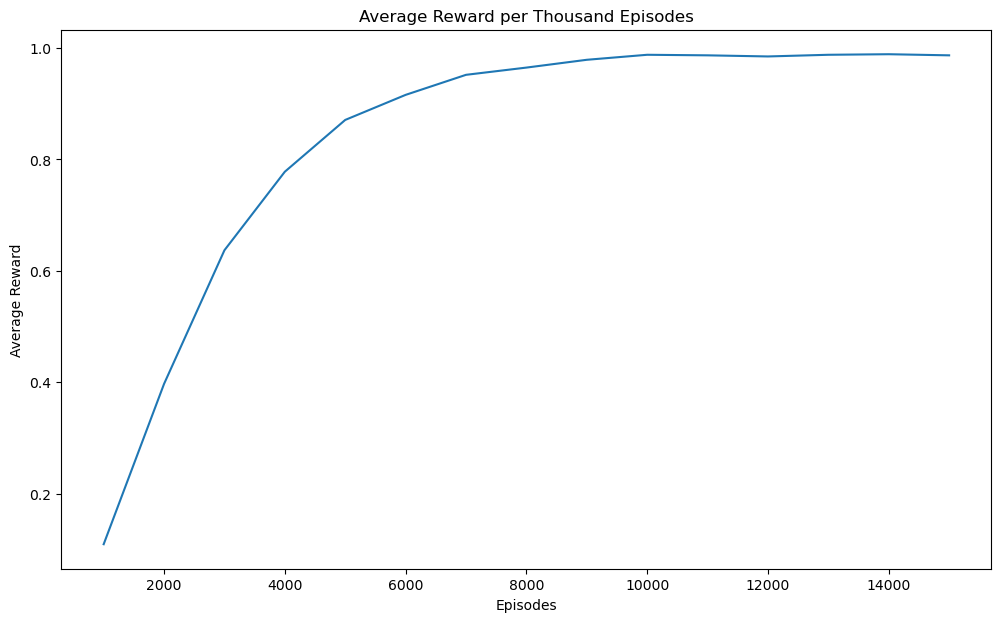

In [5]:
# Cell 5: Visualization of Training Results
import matplotlib.pyplot as plt

# Calculate average reward per thousand episodes
rewards_per_thousand_episodes = np.array(rewards_all_episodes)
num_thousand_episodes = len(rewards_per_thousand_episodes) // 1000

if len(rewards_per_thousand_episodes) % 1000 != 0:
    rewards_per_thousand_episodes = rewards_per_thousand_episodes[:num_thousand_episodes * 1000]

rewards_per_thousand_episodes = rewards_per_thousand_episodes.reshape(-1, 1000)
averages = np.mean(rewards_per_thousand_episodes, axis=1)

# Plotting the average reward per thousand episodes
plt.figure(figsize=(12, 7))
plt.plot(range(1000, num_thousand_episodes * 1000 + 1, 1000), averages)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward per Thousand Episodes')
plt.show()

# 🔍 Key insights

Analyzing the deterministic Frozen Lake environment:

### Insights:

1. **Quick Learning**: The sharp rise at the start suggests the agent learns fast, likely because the environment's predictability helps.

2. **Approaching Optimal Performance**: Rewards near 1.0 mean the agent often reaches the goal, showing effective learning with chosen hyperparameters.

3. **Learning Plateau**: After the initial surge, the curve flattens, indicating stable performance near the goal.

4. **Good Exploration Balance**: The exploration rate allows enough exploration before settling into a successful strategy.

5. **Potential Early Convergence**: Performance stabilizes early, hinting that training episodes could be shortened without losing effectiveness.

### Conclusion:

The agent learns well with these hyperparameters, almost maximizing rewards.

For future runs, stopping training once rewards stabilize near 1.0 could save time and resources, while still achieving effective learning.

# 5. Evaluate the Agent

In [6]:
# Cell 6: Evaluate the Agent
for episode in range(3):
    initial_state = env.reset()
    state = initial_state[0] if isinstance(initial_state, tuple) else initial_state  # Extract state index correctly
    terminated = False
    truncated = False
    print("*****Episode ", episode + 1, "*****\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state,:])
        new_state, reward, terminated, truncated, info = env.step(action)
        new_state = new_state[0] if isinstance(new_state, tuple) else new_state  # Extract state index correctly

        if terminated or truncated:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(2)
            else:
                print("****You fell through a hole!****")
                time.sleep(2)
            clear_output(wait=True)
            break
        state = new_state
        
env.close()

****You reached the goal!****


# 6. Comparing Exploration Strategies

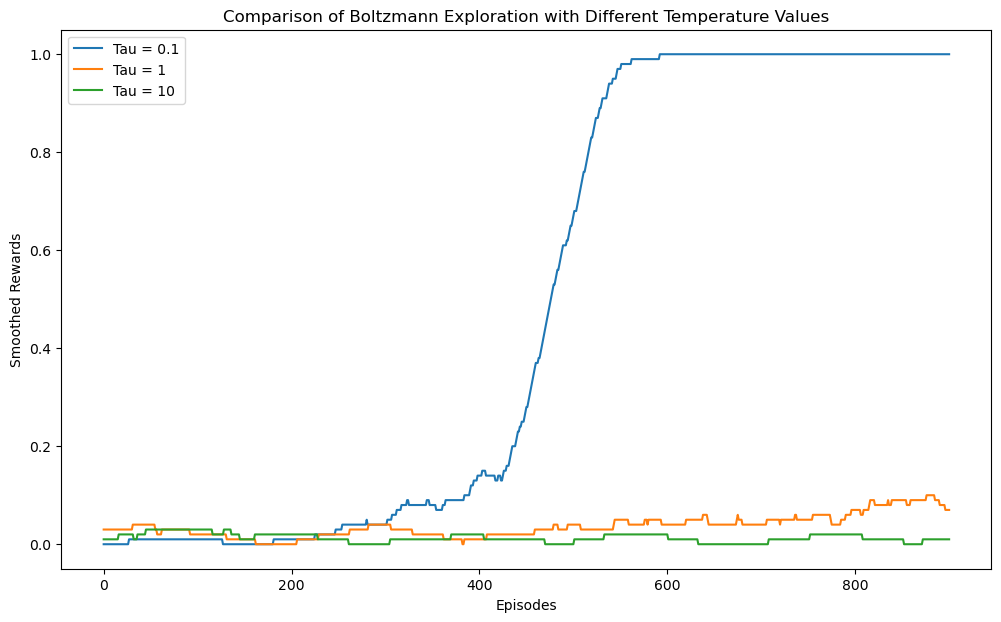

In [7]:
# Cell 7: Comparing Exploration Strategies
def boltzmann_exploration(q_values, tau):
    probabilities = np.exp(q_values / tau) / np.sum(np.exp(q_values / tau))
    action = np.random.choice(range(len(q_values)), p=probabilities)
    return action

# Redefine Q-learning with exploration strategy as a parameter
def run_q_learning(env, episodes, strategy='epsilon-greedy', tau=1.0):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []

    for i in range(episodes):
        initial_state = env.reset()
        state = initial_state[0] if isinstance(initial_state, tuple) else initial_state  # state is an integer
        terminated = False
        truncated = False
        total_reward = 0
        
        while not (terminated or truncated):
            if strategy == 'epsilon-greedy':
                action = np.argmax(q_table[state]) if np.random.random() > exploration_rate else env.action_space.sample()
            elif strategy == 'boltzmann':
                action = boltzmann_exploration(q_table[state], tau)
                
            next_state, reward, terminated, truncated, info = env.step(action)
            next_state = next_state[0] if isinstance(next_state, tuple) else next_state  # new_state is an integer

            # Update Q-table
            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_rate * next_max)
            q_table[state, action] = new_value
            
            state = next_state
            total_reward += reward
            
        rewards.append(total_reward)
    
    return rewards

# Experiment with different temperatures for Boltzmann exploration
tau_values = [0.1, 1, 10]
results = {}
for tau in tau_values:
    results[tau] = run_q_learning(env, 1000, 'boltzmann', tau)

# Plot results
plt.figure(figsize=(12, 7))
for tau, rewards in results.items():
    plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'), label=f'Tau = {tau}')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Smoothed Rewards')
plt.title('Comparison of Boltzmann Exploration with Different Temperature Values')
plt.show()

# 🔍 Key insights
Analyzing Boltzmann exploration in Frozen Lake:

### Insights:

1. **Low Temperature (τ = 0.1)**: Quick convergence to optimal policy, exploiting known actions efficiently.

2. **Medium Temperature (τ = 1)**: Consistently low performance due to excessive exploration.

3. **High Temperature (τ = 10)**: Excessive exploration leads to rare goal finding, ineffective in a predictable environment.

### Conclusions:

In short, the graph suggests that the agent with a lower temperature parameter (τ = 0.1) for Boltzmann exploration quickly learned an effective strategy and achieved a high level of performance in the deterministic Frozen Lake environment. In contrast, agents with higher temperature parameters (τ = 1 and τ = 10) did not improve significantly, maintaining a low average reward throughout the training episodes, which indicates a suboptimal performance likely due to excessive exploration.